# Tejas Dadhaniya

## Task
> Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. Dataset available at: https://bit.ly/3i4rbWl


In [40]:
# Import necessary library.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Read the dataset
df = pd.read_csv('SampleSuperstore.csv')

In [42]:
# Fetch frist five records.
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Questions
1. proprotion of different mode of shipment ?
2. proprotion of different segment ?
3. In which city produce more sales ?
4. City's region wise analysis
5. Which category sold more ? In which city ? in which region ?
6. Which product make more profit ?
7. Which product sales more in perticular city ?

In [43]:
# String manipulation.
# Upadate columns name sothat we can easily access. 
df.columns = df.columns.str.replace(' ' , '_')
df.columns = df.columns.str.replace('-' , '_')
df.columns = df.columns.str.lower()

In [44]:
# US state abbriviation. 
# This abbriviation used later when we plot choropleth.
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [45]:
df['state_abbrev'] = [us_state_abbrev[state] for state in df.state]

In [ ]:
df1 = df.copy()

In [46]:
# Checking wheather missing values present or not.
df.isnull().sum()

ship_mode       0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
sales           0
quantity        0
discount        0
profit          0
state_abbrev    0
dtype: int64

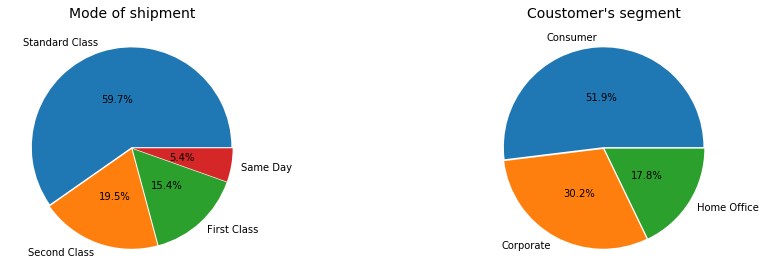

In [47]:
# Create two subplots
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4))

# Pie chart for mode of shipment
ship_mode_counts = pd.DataFrame(df.ship_mode.value_counts())
labels = ship_mode_counts.index
ax1.pie(x=ship_mode_counts.ship_mode, 
        autopct="%.1f%%", 
        explode=[0.01]*4, 
        labels=labels, 
        pctdistance=0.5)
ax1.set_title("Mode of shipment", fontsize=14)

# Pie chart for Customer's Segment 
segment_counts = pd.DataFrame(df.segment.value_counts())
labels = segment_counts.index
ax2.pie(x=segment_counts.segment, 
        autopct="%.1f%%", 
        explode=[0.01]*3, 
        labels=labels, 
        pctdistance=0.5)
ax2.set_title("Coustomer's segment", fontsize=14)
f.tight_layout()

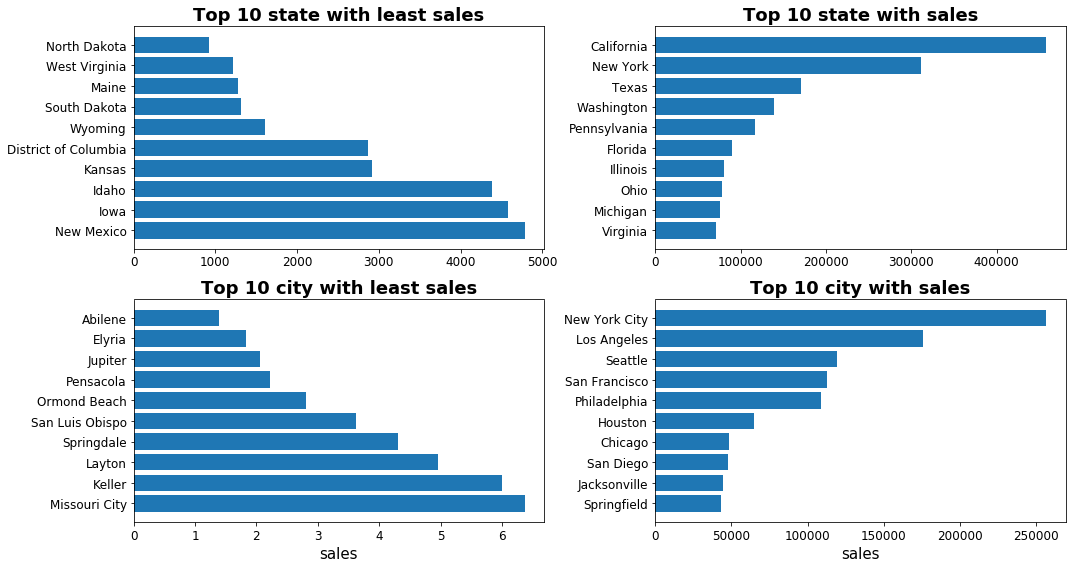

In [28]:
# Grouping each state by total sales.
state_sales = pd.DataFrame( df.groupby('state')['sales'].sum())
# Top 10 states by sales
state_sales_top = state_sales.sort_values(ascending=True, by='sales').tail(10)
# States having least sales
state_sales_bottom = state_sales.sort_values(ascending=False, by='sales').tail(10)

# Grouping each city by total sales.
city_sales = pd.DataFrame( df.groupby('city')['sales'].sum())
# Top 10 city by sales
city_sales_top = city_sales.sort_values(ascending=True, by='sales').tail(10)
# Cities having least sales
city_sales_bottom = city_sales.sort_values(ascending=False, by='sales').tail(10)

# Create four subplots 
# Plot bar chart of top 10 states and cities with most sales and least sales 
fig = plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1 )
plt.title('Top 10 state with least sales',fontsize=18,fontweight='bold')
plt.barh(state_sales_bottom.index, state_sales_bottom.sales)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 2)
plt.title('Top 10 state with sales',fontsize=18,fontweight='bold')
plt.barh(state_sales_top.index, state_sales_top.sales)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 3)
plt.title('Top 10 city with least sales',fontsize=18,fontweight='bold')
plt.barh(city_sales_bottom.index, city_sales_bottom.sales)
plt.xlabel('sales',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 4)
plt.title('Top 10 city with sales',fontsize=18,fontweight='bold')
plt.barh(city_sales_top.index, city_sales_top.sales)
plt.xlabel('sales',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

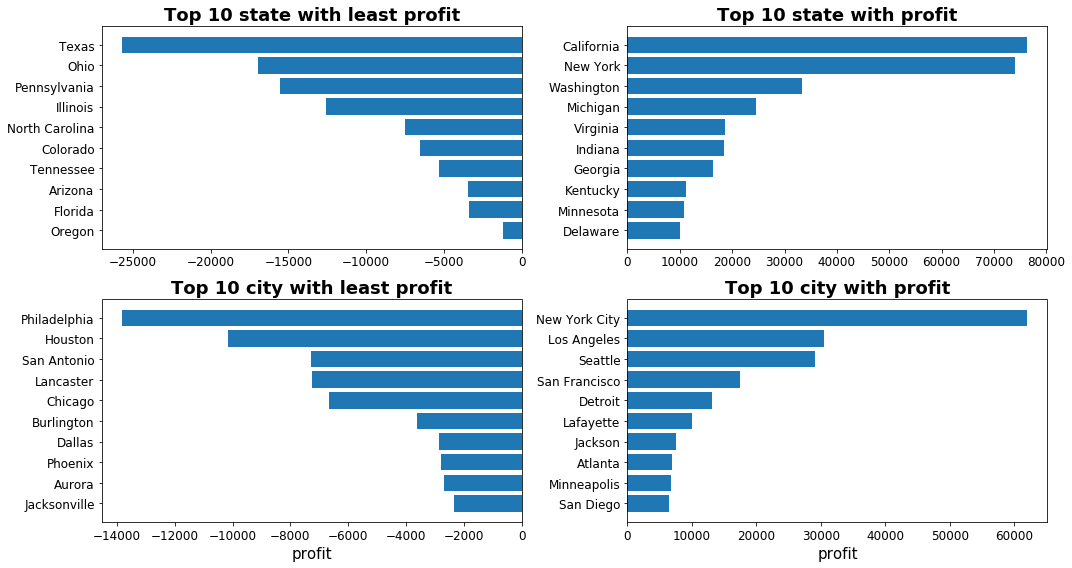

In [29]:
# Grouping each state by total sales.
state_sales = pd.DataFrame( df.groupby('state')['profit'].sum())
# Top 10 states by sales
state_sales_top = state_sales.sort_values(ascending=True, by='profit').tail(10)
# States having least sales
state_sales_bottom = state_sales.sort_values(ascending=False, by='profit').tail(10)

# Grouping each city by total sales.
city_sales = pd.DataFrame( df.groupby('city')['profit'].sum())
# Top 10 city by sales
city_sales_top = city_sales.sort_values(ascending=True, by='profit').tail(10)
# Cities having least sales
city_sales_bottom = city_sales.sort_values(ascending=False, by='profit').tail(10)

# Create four subplots 
# Plot bar chart of top 10 states and cities with most sales and least sales 
fig = plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1 )
plt.title('Top 10 state with least profit',fontsize=18,fontweight='bold')
plt.barh(state_sales_bottom.index, state_sales_bottom.profit)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 2)
plt.title('Top 10 state with profit',fontsize=18,fontweight='bold')
plt.barh(state_sales_top.index, state_sales_top.profit)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 3)
plt.title('Top 10 city with least profit',fontsize=18,fontweight='bold')
plt.barh(city_sales_bottom.index, city_sales_bottom.profit)
plt.xlabel('profit',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 4)
plt.title('Top 10 city with profit',fontsize=18,fontweight='bold')
plt.barh(city_sales_top.index, city_sales_top.profit)
plt.xlabel('profit',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

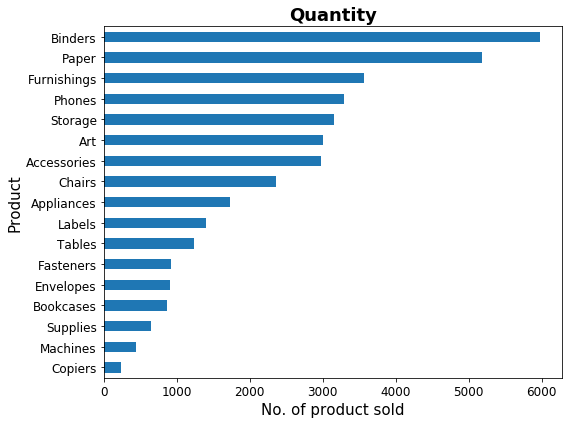

In [30]:
# Visualize which item sold more.
quantity_of_product= pd.DataFrame(df.groupby('sub_category')['quantity'].sum()).sort_values(by='quantity', ascending=True)
plt.figure(figsize=(8,6))
quantity_of_product.quantity.plot(kind='barh')
plt.title('Quantity',fontsize=18,fontweight='bold')
plt.xlabel('No. of product sold', fontsize=15)
plt.ylabel('Product', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

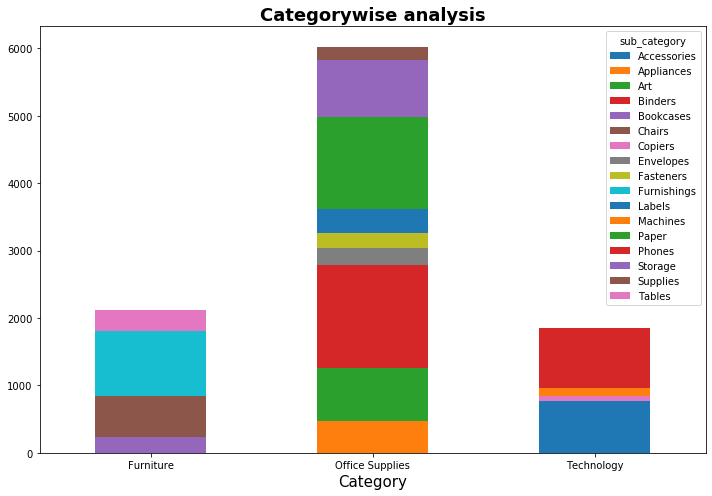

In [31]:
# Categorywise analysis
# In each category which product sold more.
pd.crosstab(df.category,df.sub_category).plot.bar(stacked=True,figsize=(10,7),rot=360)
plt.title('Categorywise analysis',fontsize=18,fontweight='bold')
plt.xlabel('Category',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

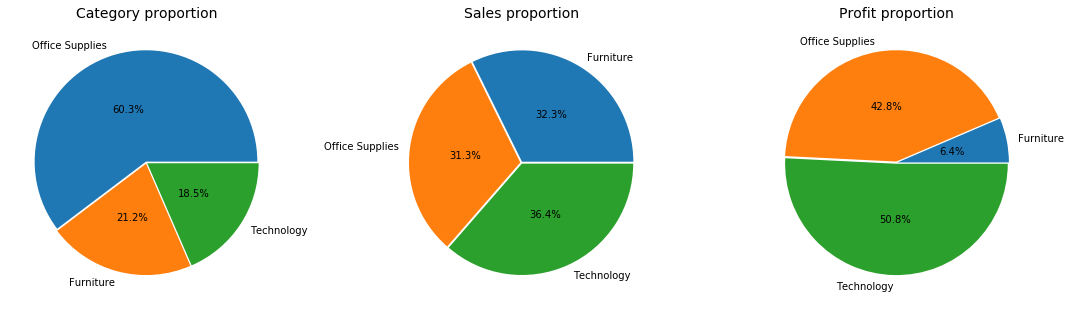

In [32]:
# Create three subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))

# Pie chart for Category proportion
category_counts = pd.DataFrame(df.category.value_counts())
labels = category_counts.index
ax1.pie(x=category_counts.category, 
        autopct="%.1f%%", 
        explode=[0.01]*3, 
        labels=labels, 
        pctdistance=0.5)
ax1.set_title("Category proportion", fontsize=14)

# Pie chart for Sales proportion
sales_by_category = pd.DataFrame(df.groupby('category')['sales'].sum())
labels = sales_by_category.index
ax2.pie(x=sales_by_category.sales, 
        autopct="%.1f%%", 
        explode=[0.01]*3, 
        labels=labels, 
        pctdistance=0.5)
ax2.set_title("Sales proportion", fontsize=14)


# Pie chart for Profit proportion
profit_by_category = pd.DataFrame(df.groupby('category')['profit'].sum())
labels = profit_by_category.index
ax3.pie(x=profit_by_category.profit, 
        autopct="%.1f%%", 
        explode=[0.01]*3, 
        labels=labels, 
        pctdistance=0.5)
ax3.set_title("Profit proportion", fontsize=14)

f.tight_layout()

<Figure size 576x432 with 0 Axes>

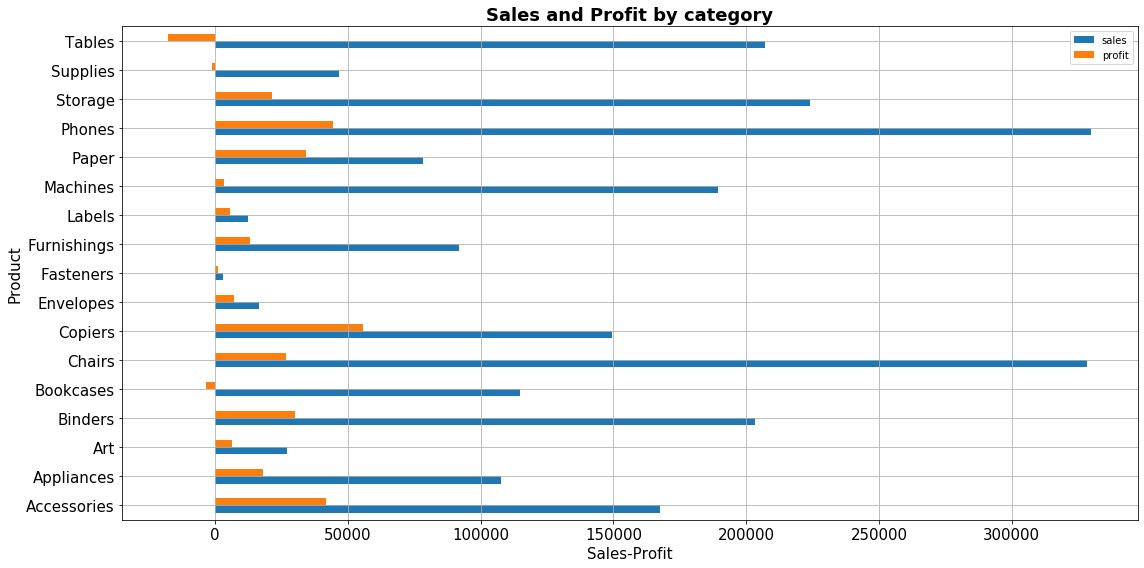

In [33]:
# Visualize total profit and sales of each product
sales = pd.DataFrame(df.groupby('sub_category')['sales'].sum())
profit_loss = pd.DataFrame(df.groupby('sub_category')['profit'].sum())
plt.figure(figsize=(8,6))
pd.concat([sales,profit_loss],axis=1).plot.barh(figsize=(16,8))
plt.title('Sales and Profit by category',fontsize=18,fontweight='bold')
plt.xlabel('Sales-Profit', fontsize=15)
plt.ylabel('Product', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

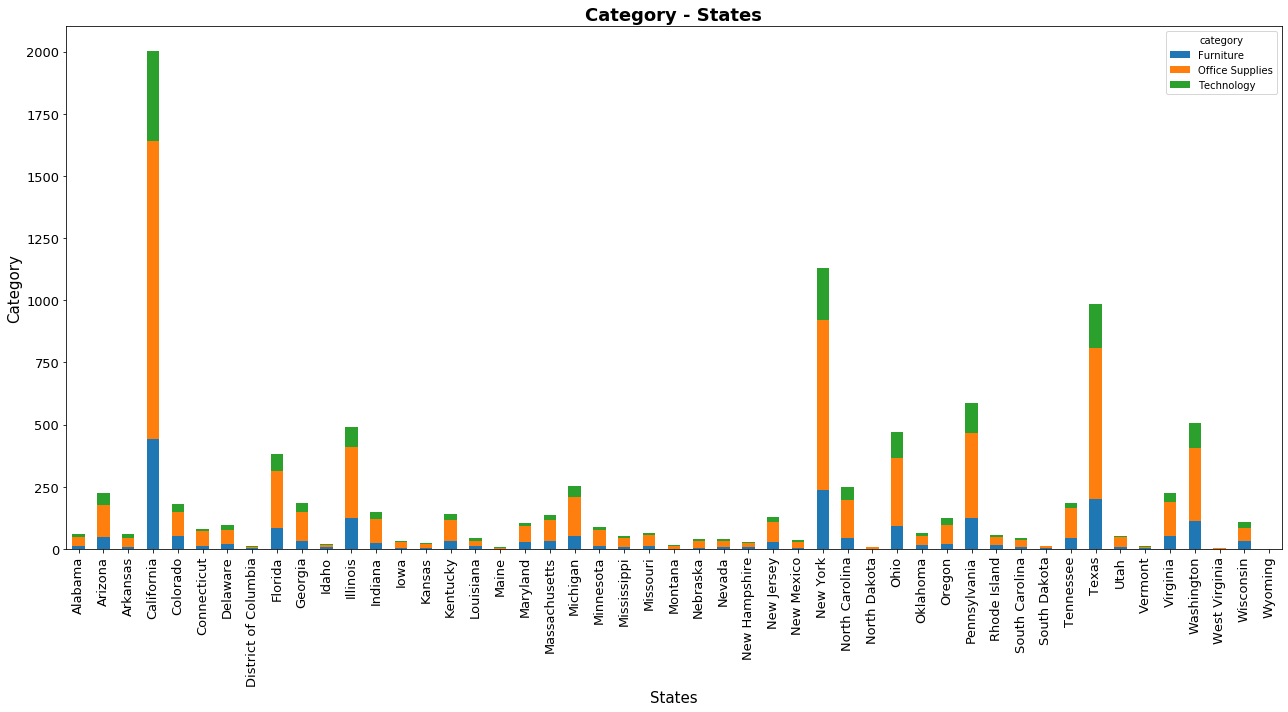

In [34]:
# Create crosstab to visualize which category of product sold more in each state.
category_by_states = pd.crosstab(df.state, df.category)
category_by_states.plot(kind='bar',stacked=True,figsize=(18,10))
plt.title('Category - States',fontsize=18,fontweight='bold')
plt.ylabel('Category',fontsize=15)
plt.xlabel('States',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()

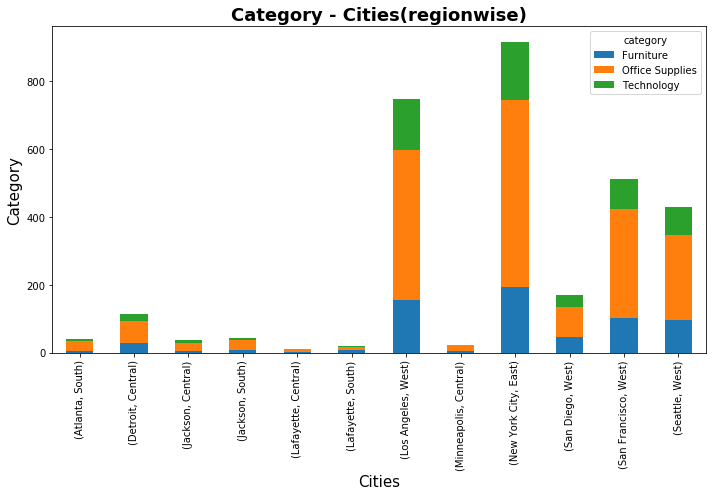

In [35]:
# Create crosstab to visualize which category of product sold more in top 10 cities based on sales.
top_cities = df.loc[df['city'].isin(city_sales_top.index)]
category_by_cities= pd.crosstab([top_cities.city, top_cities.region], top_cities.category)
category_by_cities.plot(kind='bar',stacked=True,figsize=(10,7))
plt.title('Category - Cities(regionwise)',fontsize=18,fontweight='bold')
plt.ylabel('Category',fontsize=15)
plt.xlabel('Cities',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

In [36]:
# Statewise visual representation of sales.
state_abr_sales = pd.DataFrame(df.groupby(['state_abbrev'])['sales','profit'].sum())
import plotly.express as px
fig = px.choropleth(state_abr_sales,
                    locations=state_abr_sales.index,
                    locationmode='USA-states',
                    color_continuous_scale="Bluyl",
                    color='sales', 
                    scope="usa",
       )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [37]:
# Statewise visual representation of profits.
import plotly.express as px
fig = px.choropleth(state_abr_sales,
                    locations=state_abr_sales.index,
                    locationmode='USA-states',
                    color_continuous_scale="Rdbu",
                    color='profit', 
                    scope="usa",
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [48]:
seg_vs_pro = pd.DataFrame(df.groupby(['segment', 'category'])['sales'].sum()).reset_index()

In [49]:
seg_vs_pro.head()

,segment,category,sales
0,Consumer,Furniture,391049.3120
1,Consumer,Office Supplies,363952.1360
2,Consumer,Technology,406399.8970
3,Corporate,Furniture,229019.7858
4,Corporate,Office Supplies,230676.4620


In [50]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(seg_vs_pro, x="segment", y="sales",
             color='category', barmode='group',
             height=400)
fig.show()